IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

LOAD DATA

In [46]:
df = pd.read_csv('data/CreditCardFraudFourYears.csv', index_col=0)

GROUP DATA

In [47]:
# Starting with grouping data by day i.e date
daily_fraud_trans = df.groupby('trans_date').size()

# Identify the fraud transactions
daily_fraud_trans = df[df['is_fraud'] == 1].groupby('trans_date').size()

# Convert the index to datetime
daily_fraud_trans.index = pd.to_datetime(daily_fraud_trans.index)

# Rename the column
daily_fraud_trans = daily_fraud_trans.rename('daily_fraud')

# Sanity check
daily_fraud_trans.head()
                                               

trans_date
2018-01-05     7
2018-01-06    28
2018-01-07    14
2018-01-09     5
2018-01-10     4
Name: daily_fraud, dtype: int64

In [48]:
daily_fraud_trans = daily_fraud_trans.reset_index()
daily_fraud_trans.head()

,trans_date,daily_fraud
0,2018-01-05,7
1,2018-01-06,28
2,2018-01-07,14
3,2018-01-09,5
4,2018-01-10,4


PLOT NUMBER OF DAILY FRAUD TRANSACTIONS

<Axes: xlabel='trans_date', ylabel='daily_fraud'>

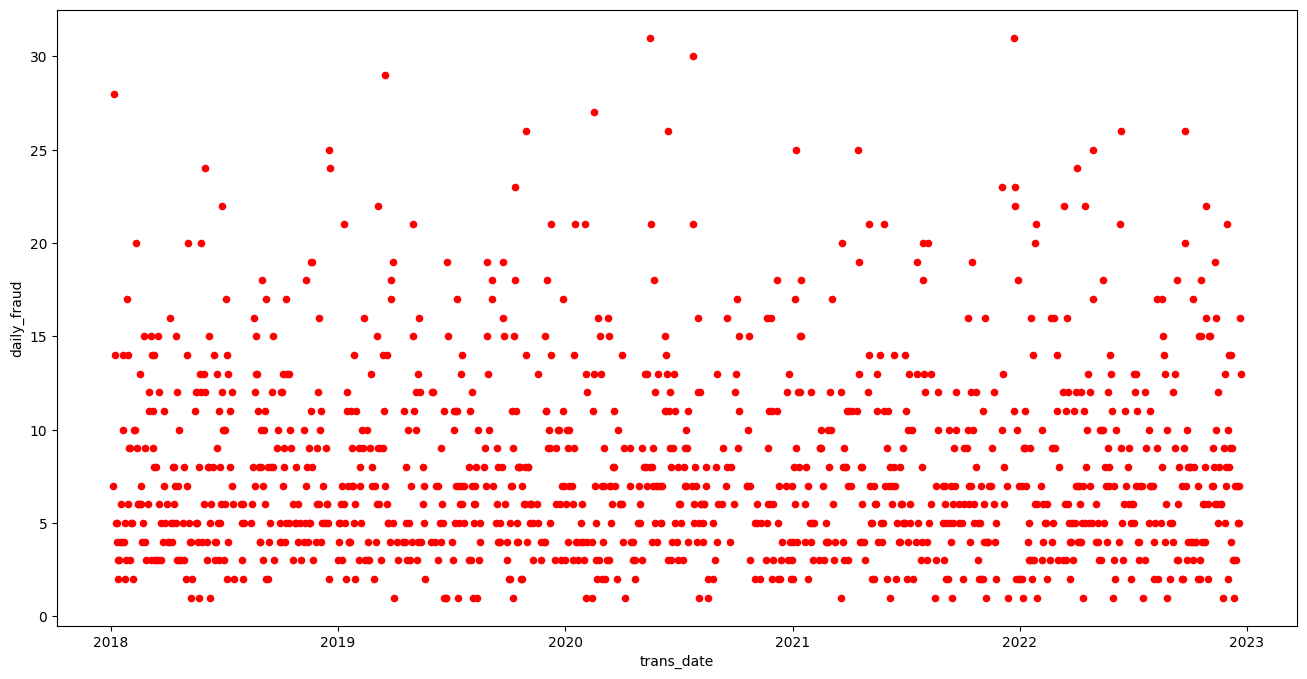

In [10]:
daily_fraud_trans.plot.scatter(x='trans_date', y='daily_fraud', figsize=(16,8), color='red')

## Split Data

In [11]:
df = daily_fraud_trans.copy()
df.head()

,trans_date,daily_fraud
0,2018-01-05,7
1,2018-01-06,28
2,2018-01-07,14
3,2018-01-09,5
4,2018-01-10,4


In [12]:
len(df)

1189

In [14]:
train = df[['daily_fraud']].iloc[:1189-30]
test = df[['daily_fraud']].iloc[1189-30:]


In [15]:
len(test)

30

## Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# FIT ONLY TRAIN DATA, OTHERWISE LEAKS SOME OF THE TEST DATA
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Generate time series data to cover test data

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 7
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=2)

In [18]:
len(df)-7-7  # Subtract test data and then subtract elements to build first array

1175

In [19]:
df.head()

,trans_date,daily_fraud
0,2018-01-05,7
1,2018-01-06,28
2,2018-01-07,14
3,2018-01-09,5
4,2018-01-10,4


In [20]:
len(generator)

576

In [21]:
generator[0]

(array([[[0.2       ],
         [0.9       ],
         [0.43333333],
         [0.13333333],
         [0.1       ],
         [0.13333333],
         [0.03333333]],
 
        [[0.9       ],
         [0.43333333],
         [0.13333333],
         [0.1       ],
         [0.13333333],
         [0.03333333],
         [0.06666667]]]),
 array([[0.06666667],
        [0.06666667]]))

In [22]:
generator[0][0].shape

(2, 7, 1)

In [23]:
generator[0][1].shape

(2, 1)

In [24]:
n_features=1

# Create the Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

2024-04-07 22:04:45.795388: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-07 22:04:45.795436: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-07 22:04:45.795448: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-07 22:04:45.795876: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-07 22:04:45.795950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(generator,epochs=35)


Epoch 1/35


2024-04-07 22:04:49.480066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


576/576 [==============================] - 72s 99ms/step - loss: 0.0309
Epoch 2/35
576/576 [==============================] - 58s 101ms/step - loss: 0.0296
Epoch 3/35
576/576 [==============================] - 55s 95ms/step - loss: 0.0292
Epoch 4/35
576/576 [==============================] - 53s 93ms/step - loss: 0.0288
Epoch 5/35
576/576 [==============================] - 58s 101ms/step - loss: 0.0284
Epoch 6/35
576/576 [==============================] - 64s 111ms/step - loss: 0.0279
Epoch 7/35
576/576 [==============================] - 57s 99ms/step - loss: 0.0277
Epoch 8/35
576/576 [==============================] - 54s 95ms/step - loss: 0.0276
Epoch 9/35
576/576 [==============================] - 54s 94ms/step - loss: 0.0276
Epoch 10/35
576/576 [==============================] - 58s 100ms/step - loss: 0.0275
Epoch 11/35
576/576 [==============================] - 55s 96ms/step - loss: 0.0274
Epoch 12/35
576/576 [==============================] - 53s 92ms/step - loss: 0.0272
Epoch 13

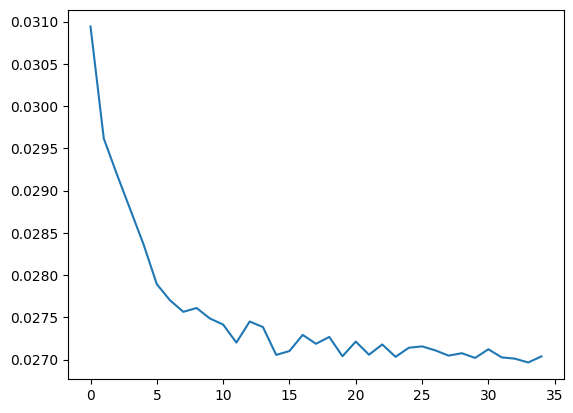

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaulate the test data

In [28]:
first_eval_batch = scaled_train[-7:]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))



2024-04-07 22:36:39.031810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step


In [29]:
current_batch.shape

(1, 7, 1)

In [30]:
np.append(current_batch[:,1:,:],[[[7]]],axis=1)

array([[[0.6       ],
        [0.16666667],
        [0.5       ],
        [0.3       ],
        [0.16666667],
        [0.13333333],
        [7.        ]]])

In [31]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
# go beyond len(test) to go into the unknown future (no way to measure success except wait!)
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


## Inverse predictions and compare

In [32]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

In [33]:
test.head()

,daily_fraud,Predictions
1159,12,7.120364
1160,8,8.034740
1161,6,7.963479
1162,6,7.721800
1163,1,7.636068


<Axes: >

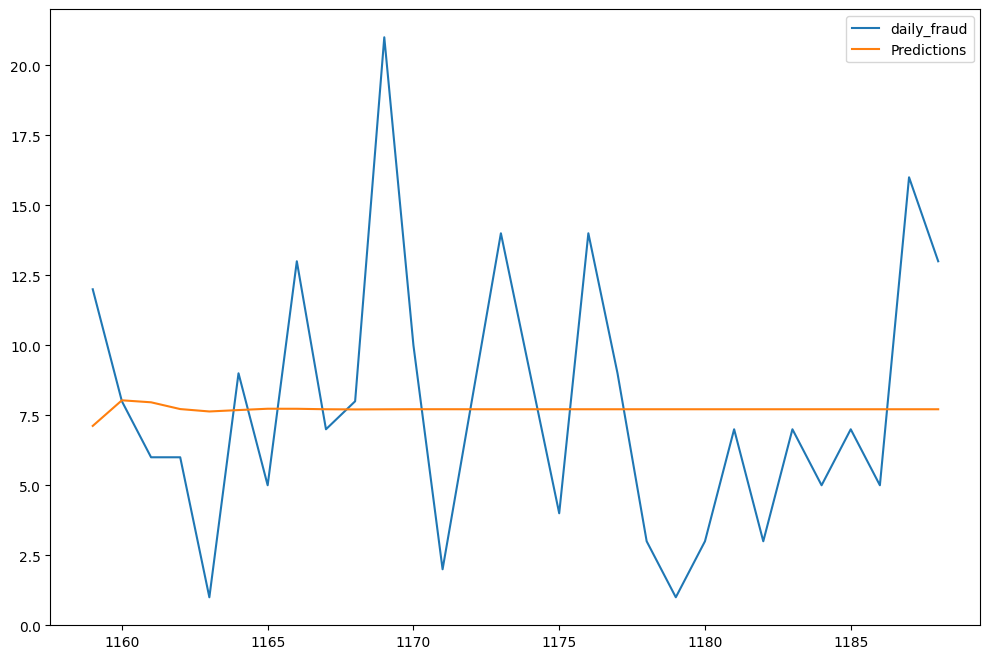

In [34]:
test.plot(figsize=(12,8))

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['daily_fraud'], test['Predictions']))
mse=mean_squared_error(test['daily_fraud'], test['Predictions'])
print(rmse)
print(mse)

4.64571204856769
21.582640438207005
